# World Happiness Geospatial

### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# To keep matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
#import the countries '.json' file
countries = r'/Users/jonahsnewmacbook/Desktop/Data Analytics/Data Immersion/Achievement 6/World Happiness/Data/world-countries.json'

In [8]:
#to look at the JSON file contents:
f = open(r'/Users/jonahsnewmacbook/Desktop/Data Analytics/Data Immersion/Achievement 6/World Happiness/Data/world-countries.json')

#return JSON object asa dictionary
data = json.load(f)

#iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [10]:
#creating a path
path = r'/Users/jonahsnewmacbook/Desktop/Data Analytics/Data Immersion/Achievement 6/World Happiness'

In [13]:
#import World Happiness Dataframe
WH = pd.read_csv(os.path.join(path, 'Data', 'WHVisuals.csv'))

In [14]:
WH.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region,Happiness Category
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Western Europe,High Happiness
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Western Europe,High Happiness


In [15]:
WH.shape

(782, 12)

### Data Wrangling

In [19]:
countries

'/Users/jonahsnewmacbook/Desktop/Data Analytics/Data Immersion/Achievement 6/World Happiness/Data/world-countries.json'

In [20]:
#I'm not really sure if I have dummy data
columns = ['Country']

In [22]:
#create a subset 
countries_rec = WH[columns]

In [23]:
countries_rec.head()

,Country
0,Switzerland
1,Iceland
2,Denmark
3,Norway
4,Canada


In [24]:
#so we see that there's no dummy
countries_num = countries_rec['Country']

In [25]:
#turns the data into a categorical variable in s2, which is pandas Series data structure
s2 = countries_rec.idxmax(axis=0)

In [26]:
s2

Country    114
dtype: int64

In [28]:
type(s2)

pandas.core.series.Series

In [29]:
countries_rec['Country'] = s2

/var/folders/yx/l6p5d3ns1r51h2lympbmd9540000gn/T/ipykernel_3599/3893875031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_rec['Country'] = s2


In [30]:
countries_rec.columns

Index(['Country'], dtype='object')

In [32]:
WH.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year',
       'Region', 'Happiness Category'],
      dtype='object')

In [33]:
type(WH)

pandas.core.frame.DataFrame

In [35]:
WH['Country'] = WH['Country'].str.title()

In [36]:
WH.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region,Happiness Category
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Western Europe,High Happiness
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Western Europe,High Happiness
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Western Europe,High Happiness
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Western Europe,High Happiness
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America,High Happiness


### Conducting Consistency Checks

In [37]:
#Check for missing nulls
WH.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
Region                           0
Happiness Category               0
dtype: int64

In [38]:
#imputing that one null
WH['Trust (Government Corruption)'].fillna(WH['Trust (Government Corruption)'].median(), inplace=True)

In [39]:
WH.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
Region                           0
Happiness Category               0
dtype: int64

In [40]:
# Duplicate check
dups = WH.duplicated()

In [41]:
dups.shape

(782,)

In [42]:
#no duplicates

Checking for extreme values

<Axes: xlabel='Happiness Score', ylabel='Count'>

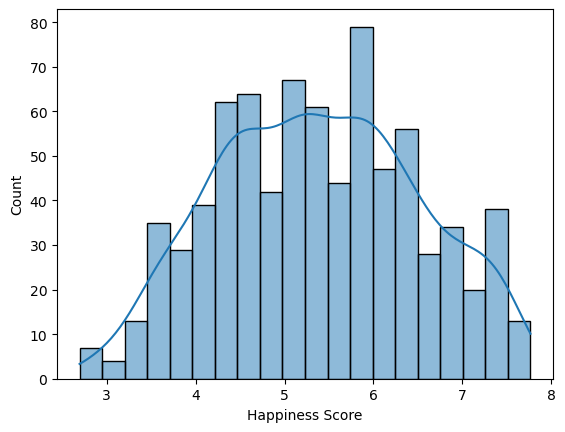

In [47]:
sns.histplot(WH['Happiness Score'], bins=20, kde = True) 

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Count'>

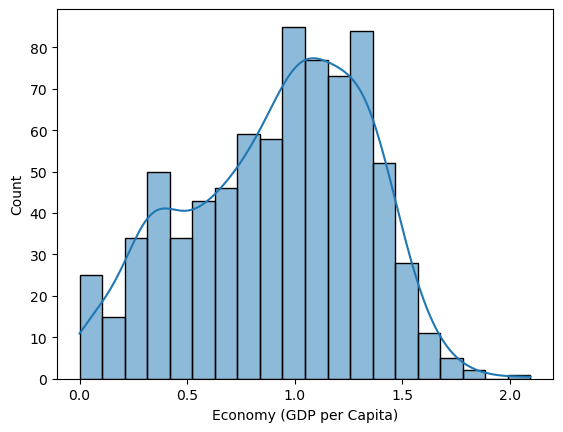

In [48]:
sns.histplot(WH['Economy (GDP per Capita)'], bins=20, kde = True) 

<Axes: xlabel='Family', ylabel='Count'>

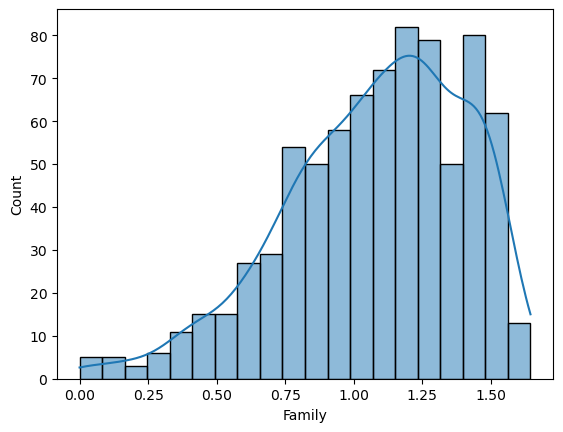

In [49]:
sns.histplot(WH['Family'], bins=20, kde = True) 

<Axes: xlabel='Health (Life Expectancy)', ylabel='Count'>

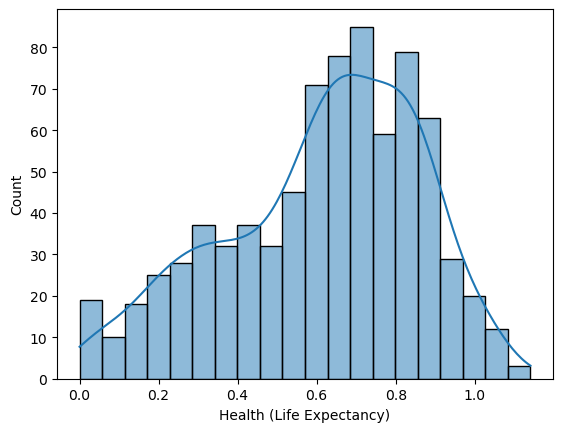

In [50]:
sns.histplot(WH['Health (Life Expectancy)'], bins=20, kde = True) 

<Axes: xlabel='Freedom', ylabel='Count'>

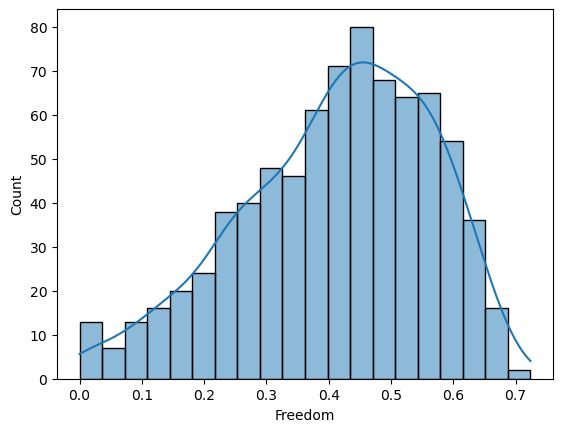

In [51]:
sns.histplot(WH['Freedom'], bins=20, kde = True) 

<Axes: xlabel='Trust (Government Corruption)', ylabel='Count'>

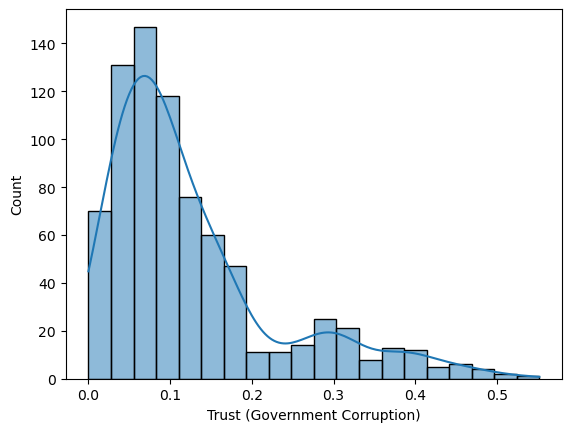

In [52]:
sns.histplot(WH['Trust (Government Corruption)'], bins=20, kde = True) 

<Axes: xlabel='Generosity', ylabel='Count'>

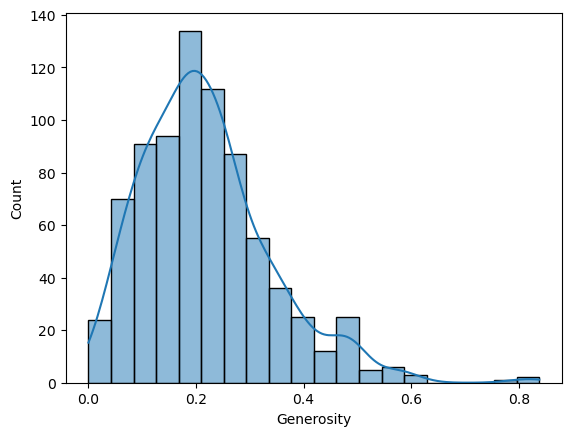

In [53]:
sns.histplot(WH['Generosity'], bins=20, kde = True) 

### Plotting a Choropleth

In [56]:
#Create a dataframe with just thet states and the happiness score

datatoplot = WH[['Country', 'Happiness Score']]
datatoplot

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
...,...,...
777,Rwanda,3.334
778,Tanzania,3.231
779,Afghanistan,3.203
780,Central African Republic,3.083


In [58]:
#Setting up a folium map

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = countries, 
    data = datatoplot,
    columns = ['Country', 'Happiness Score'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Happiness Score").add_to(map)
folium.LayerControl().add_to(map)

map

In [59]:
map.save('plot_data.html')

### Choropleth Result
This map helps a lot with my project as I wanted to see which countries have high and low happiness score.
This analysis made me wonder how some countries in the African continent have very high happiness score and most have low happiness score.